### Creating helper functions that we already have created

In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-07-04 14:56:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-04 14:56:39 (114 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



### using Keras Aplications for pretrained models 

https://www.google.com/search?q=tensor+flow+keras+aplications&oq=tensor+flow+keras+aplications&aqs=chrome..69i57j0i13j0i13i30j0i22i30j0i10i22i30j0i22i30l2j0i10i22i30j0i22i30l2.17395j0j7&sourceid=chrome&ie=UTF-8


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


--2022-07-04 14:56:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   215MB/s    in 0.7s    

2022-07-04 14:56:40 (215 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [6]:
import tensorflow as tf

IMG_SIZE = (224,224)

## Make batches of 32 immages for better learning 
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size= IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data =  tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                            image_size= IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
### Checking CLass names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
for images, lables in train_data_10_percent.take(1):
  print(images, lables)

tf.Tensor(
[[[[1.60647964e+02 1.46647964e+02 1.19647957e+02]
   [1.42265305e+02 1.27311226e+02 1.04173470e+02]
   [1.40846939e+02 1.24489799e+02 1.02285713e+02]
   ...
   [1.91429443e+01 3.47093239e+01 1.21480169e+01]
   [2.32398014e+01 4.15510178e+01 1.85459652e+01]
   [2.89695168e+01 4.60970459e+01 3.10410156e+01]]

  [[1.49857147e+02 1.35857147e+02 1.06948975e+02]
   [1.50035721e+02 1.34964294e+02 1.06244896e+02]
   [1.47147949e+02 1.30403061e+02 9.98622437e+01]
   ...
   [2.21582279e+01 3.18572521e+01 7.37251282e+00]
   [2.97907906e+01 4.20050888e+01 2.02092228e+01]
   [3.12807446e+01 4.34236031e+01 2.99236717e+01]]

  [[1.71989792e+02 1.57698990e+02 1.22071434e+02]
   [1.60836731e+02 1.45892853e+02 1.06178566e+02]
   [1.60494888e+02 1.43020416e+02 9.83061218e+01]
   ...
   [2.39491005e+01 3.40716019e+01 1.11430101e+01]
   [3.88010483e+01 5.29592285e+01 3.61735802e+01]
   [5.72861671e+01 7.22097015e+01 6.49954834e+01]]

  ...

  [[1.60596924e+02 1.49168396e+02 1.44872574e+02]
   [1

### Build a feature extraction model with the keras Functional Api


In [10]:
from re import X

#Create a base model with rf.kerasAplications

Base_model = tf.keras.applications.EfficientNetB0( include_top=False)

#Freeze the base model (So pre-learned patterns remains)
Base_model.trainable = False 

# Create Imputs into base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_name")

#Passing the inputs

x = Base_model(inputs)

#Check data shape after passing in to model_base
print(f"Shape after base model: {x.shape}")

#Avarage pool the outputs of the base model 

x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_poolling_layer")(x)
print(f"After Flobal Average Pooling 2D():{x.shape}")

#Create the output activation layers 
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# combine the inputs with the outputs into a model

model_0 = tf.keras.Model(inputs,outputs)

#Compile the model

model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Fit the model

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25*len(test_data)),
                                 callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_features _extract")])




16719872/16705208 [==============================] - 0s 0us/step
Shape after base model: (None, 7, 7, 1280)
After Flobal Average Pooling 2D():(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_features _extract/20220704-145649
Epoch 1/5
24/24 [==============================] - 23s 261ms/step - loss: 1.9362 - accuracy: 0.3747 - val_loss: 1.3614 - val_accuracy: 0.6891
Epoch 2/5
24/24 [==============================] - 5s 182ms/step - loss: 1.1675 - accuracy: 0.7347 - val_loss: 0.8989 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 5s 174ms/step - loss: 0.8394 - accuracy: 0.7987 - val_loss: 0.7289 - val_accuracy: 0.8322
Epoch 4/5
24/24 [==============================] - 4s 148ms/step - loss: 0.6825 - accuracy: 0.8347 - val_loss: 0.6265 - val_accuracy: 0.8355
Epoch 5/5
24/24 [==============================] - 4s 148ms/step - loss: 0.5927 - accuracy: 0.8667 - val_loss: 0.5893 - val_accuracy: 0.8487


In [11]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 75ms/step - loss: 0.6198 - accuracy: 0.8360


[0.6198275089263916, 0.8360000252723694]

In [12]:
for layer_number, layer in enumerate(Base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [13]:
#summary of the base model


In [14]:
Base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [15]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_name (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_average_poolling_lay  (None, 1280)             0         
 er (GlobalAveragePooling2D)                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


### So what we did?

We create a input layer, stack the eficientnet on the middle, then we make it a vector and finally we output in a shape of 10 

##Getting a feature vector from a trained model

The tf.keras.layers.GlobalAveragePooling2D() layer transforms a 4D tensor into a 2D tensor by averaging the values across the inner-axes.

The previous sentence is a bit of a mouthful, so let's see an example.

## What it does?

One of the reasons feature extraction transfer learning is named how it is is because what often happens is a pretrained model outputs a feature vector (a long tensor of numbers, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of.


In [16]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


.

###  <h1> Transfer learning Experiments 

Now we will use the same but with the 1% of the data

1. <h1> Model 1 -> Use feature extraction transfer learning with 1% of the data with data argumentation.

2. <h1> Model 2 -> Use feature extraction transfer learning with 10% of the data with data argumentation.

3. <h1> Model 3 -> Use fine- tuning TransferLearning on 10%of the data with data argumentation.

4. <h1>  Model 4 -> Use fine- tuning TransferLearning on 100% of the data with data argumentation.

### We will use the same test dataset for this experiments


In [17]:
# DOWNLOAD AND UNZIP DATA 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"




--2022-07-04 14:57:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   119MB/s    in 1.1s    

2022-07-04 14:57:44 (119 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



#### Preprocesing Data

In [18]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There a

In [19]:
IMG_SIZE =(224,224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_1_percent,
                                                                            image_size= IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data =  tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                            image_size= IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)



Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


<h1> Data Augmentation </h1>

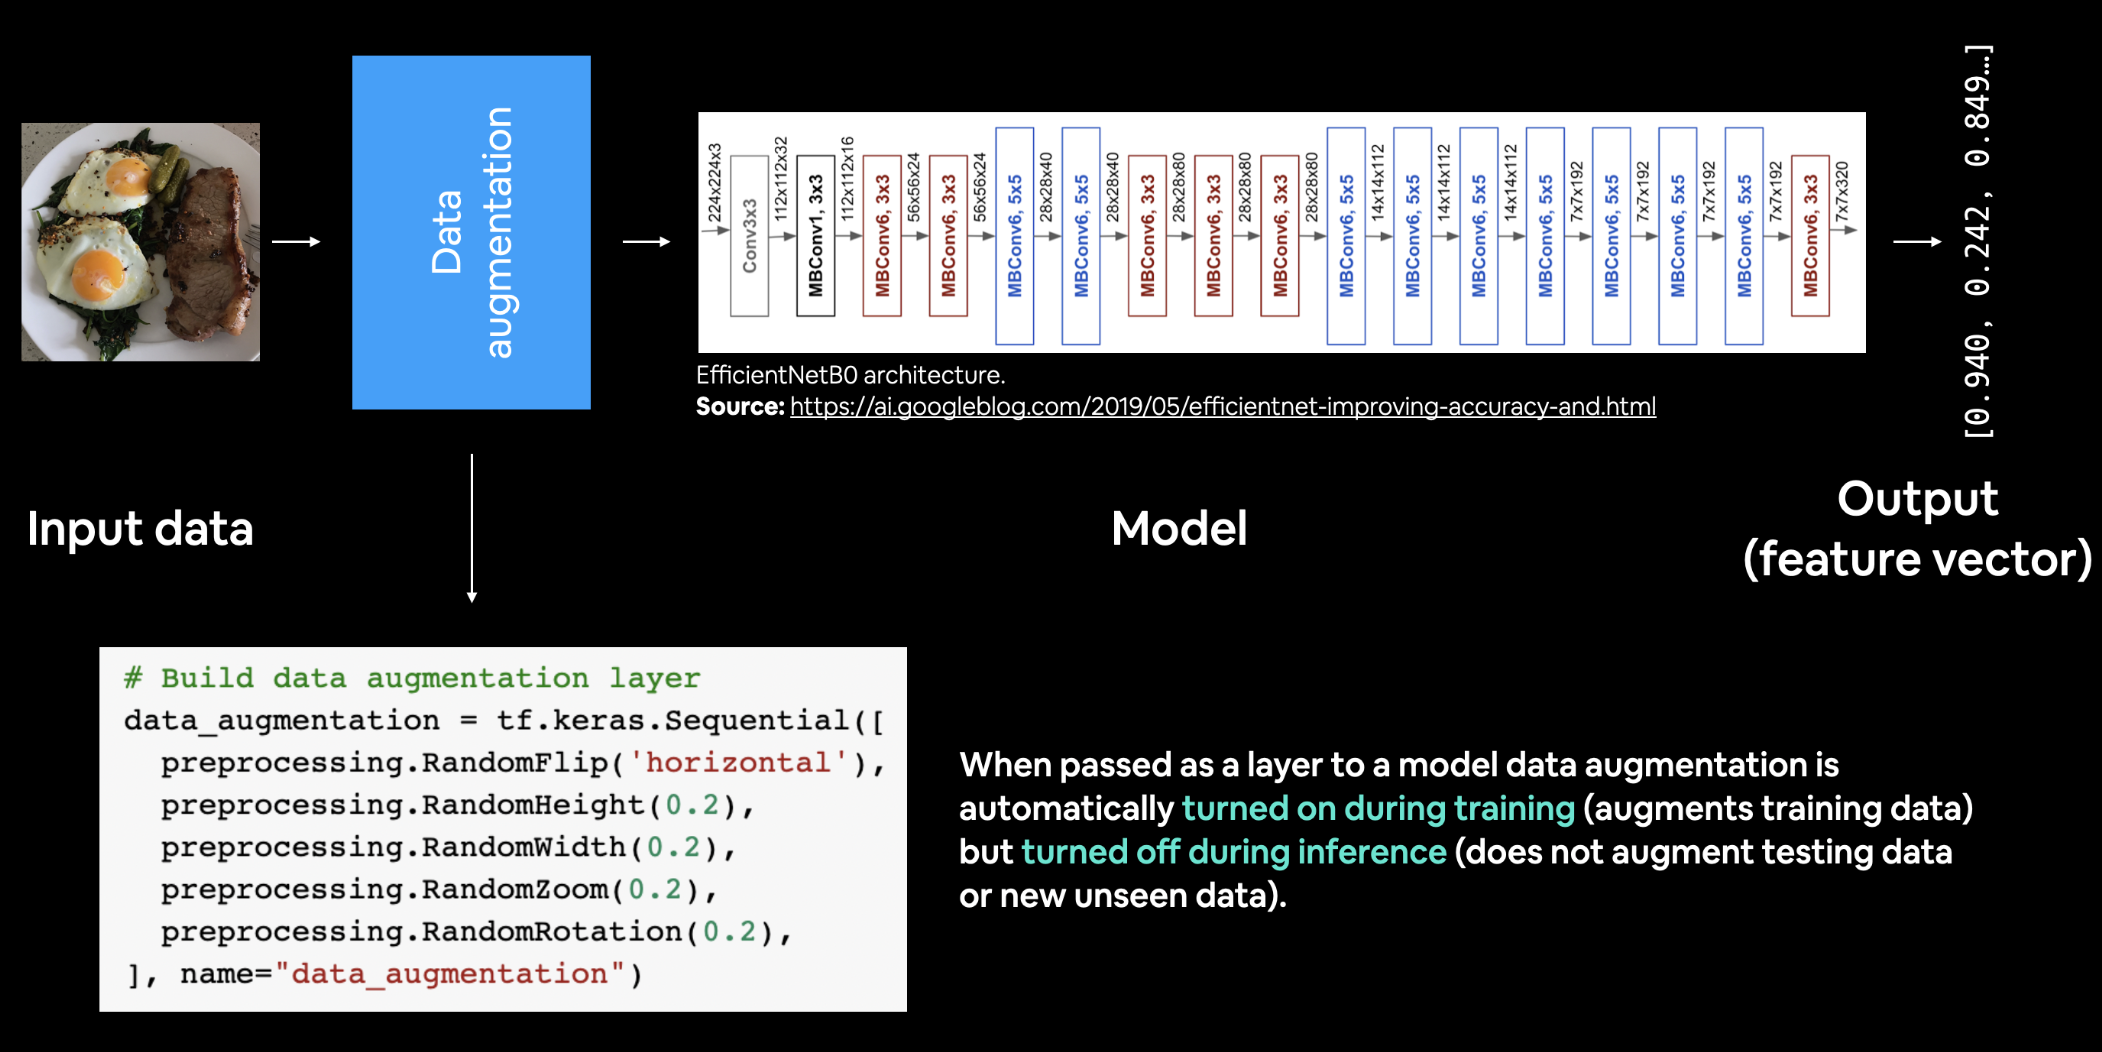

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


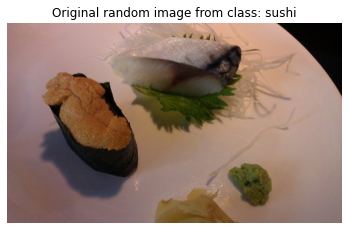

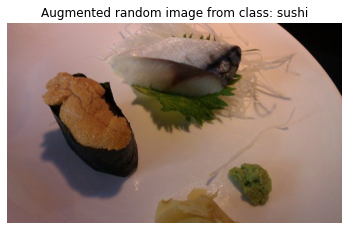

In [21]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## MODEL 1 : FRATURE EXTRACTION TRANSFER LEARNING ON 1% OF THE DATA WITH DATA AUGMENTATION


In [22]:
# Setuo input shape and base model, freezing the base model layer
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False


#Create Input lAYERS
inputs = layers.Input(shape = input_shape , name ="input_layer")

## Add in data augmentation sequential model as a layer
x = data_augmentation(inputs)

##Give base model the input(after augmentation) and not train it
x = base_model(x, training = False)

#Pool output features of the base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

#Create the output activation layers 
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)

## compile

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])



Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220704-145748
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.4223 - accuracy: 0.1429 - val_loss: 2.2296 - val_accuracy: 0.1760
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1859 - accuracy: 0.2143 - val_loss: 2.1116 - val_accuracy: 0.2648
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 2.0088 - accuracy: 0.2857 - val_loss: 2.0152 - val_accuracy: 0.3240
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8255 - accuracy: 0.5143 - val_loss: 1.9269 - val_accuracy: 0.4375
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6824 - accuracy: 0.6000 - val_loss: 1.8206 - val_accuracy: 0.4918


In [23]:
result_1_percent_data_aug = model_1.evaluate(test_data)
result_1_percent_data_aug

79/79 [==============================] - 6s 71ms/step - loss: 1.8241 - accuracy: 0.4692


[1.8240584135055542, 0.4691999852657318]

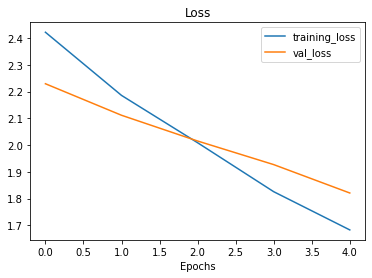

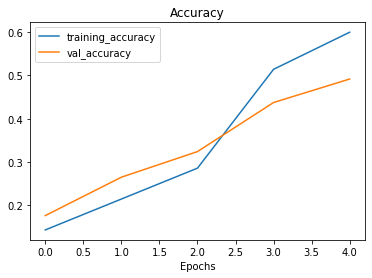

In [24]:
plot_loss_curves(history_1_percent)


### <h1>  Model 2  
###Use feature extraction transfer learning with 10% of the data with data argumentation. 

In [25]:

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### <h1> Using Model Checkpoint CallBacks
### Remember callbacks are tools that add functionalities during training 
### Tensor board : Log The performance of diferent models and compare them 
### Stop your model in the middle of training, that way you can come after and continue the training

In [26]:
# Fit the model
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)



In [27]:
# Fit the model
history_10_percent_model_2 = model_2.fit(train_data_10_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_10_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220704-145822
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0250 - accuracy: 0.3160
Epoch 1: val_loss improved from inf to 1.51465, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 532ms/step - loss: 2.0250 - accuracy: 0.3160 - val_loss: 1.5147 - val_accuracy: 0.6447
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3585 - accuracy: 0.6800
Epoch 2: val_loss improved from 1.51465 to 1.05164, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 387ms/step - loss: 1.3585 - accuracy: 0.6800 - val_loss: 1.0516 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0696 - accuracy: 0.7413
Epoch 3: val_loss improved from 1.05164 to 0.86063, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

In [28]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6883 - accuracy: 0.8120


###<h1> Model 3 With Fine Tunning 
### Top Layer trained on custom data, top 10 layers Unfrozen

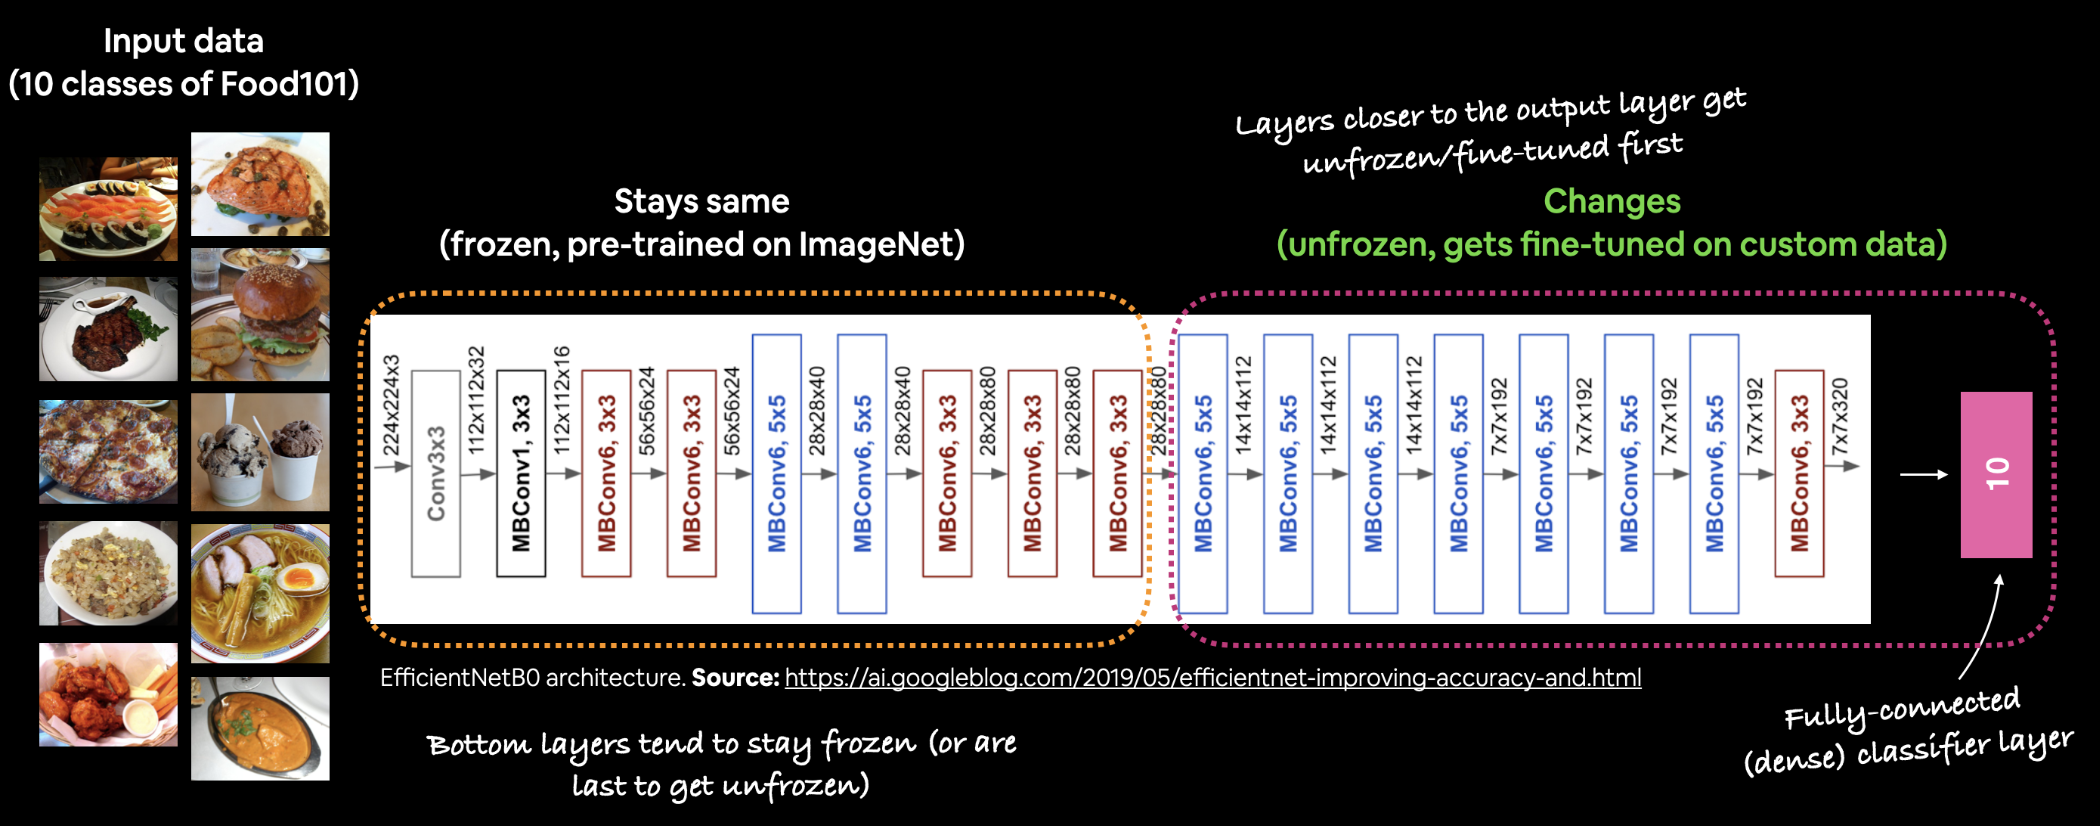

### Lets Fine tune  our model 2 

In [29]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa7deb9c790> True
<keras.engine.sequential.Sequential object at 0x7fa7ddbdbd90> True
<keras.engine.functional.Functional object at 0x7fa7de62d450> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fa7deb31210> True
<keras.layers.core.dense.Dense object at 0x7fa7deb9cd50> True


In [30]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [31]:
### Lets setting the last 10 layers of our base_model unfrozen
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False


# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [33]:
# Fine tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_model_2.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220704-145932
Epoch 5/10
24/24 [==============================] - 18s 434ms/step - loss: 0.6787 - accuracy: 0.8080 - val_loss: 0.5371 - val_accuracy: 0.8240
Epoch 6/10
24/24 [==============================] - 9s 372ms/step - loss: 0.5372 - accuracy: 0.8413 - val_loss: 0.5168 - val_accuracy: 0.8240
Epoch 7/10
24/24 [==============================] - 8s 333ms/step - loss: 0.4826 - accuracy: 0.8507 - val_loss: 0.5193 - val_accuracy: 0.8174
Epoch 8/10
24/24 [==============================] - 10s 400ms/step - loss: 0.4386 - accuracy: 0.8587 - val_loss: 0.4991 - val_accuracy: 0.8257
Epoch 9/10
24/24 [==============================] - 9s 382ms/step - loss: 0.4034 - accuracy: 0.8693 - val_loss: 0.4998 - val_accuracy: 0.8289
Epoch 10/10
24/24 [==============================] - 8s 333ms/step - loss: 0.3540 - accuracy: 0.8880 - val_loss: 0.4794 - val_accuracy: 0.8273


In [34]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3160000145435333, 0.6800000071525574, 0.7413333058357239, 0.7826666831970215, 0.7946666479110718, 0.8080000281333923, 0.8413333296775818, 0.8506666421890259, 0.8586666584014893, 0.8693333268165588, 0.8880000114440918]


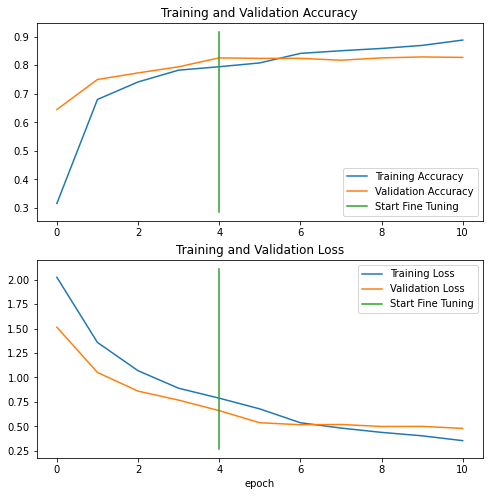

In [35]:
compare_historys(original_history=history_10_percent_model_2, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=5)

### <h1> MODEL 4 WITH 100% OF THE DATA

In [38]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


--2022-07-04 15:06:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   111MB/s    in 4.5s    

2022-07-04 15:06:08 (111 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [39]:
walk_through_dir("10_food_classes_all_data")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

## Seting up the tensors

In [46]:
import tensorflow as tf

IMG_SIZE = (224,224)

## Make batches of 32 immages for better learning 
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size= IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)

test_data =  tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                            image_size= IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)




Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### I will revert the model 2 to use it, beofre the first fine tuning 

In [44]:
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path) # revert model back to saved weights

In [45]:
### check which layers are trainble 
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [47]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # divide learning rate by 10 for fine-tuning
                metrics=["accuracy"])

# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_model_2.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220704-151417
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


235/235 [==============================] - 60s 231ms/step - loss: 0.7214 - accuracy: 0.7687 - val_loss: 0.4201 - val_accuracy: 0.8470
Epoch 6/10
235/235 [==============================] - 48s 201ms/step - loss: 0.5948 - accuracy: 0.8116 - val_loss: 0.4023 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - 44s 185ms/step - loss: 0.5157 - accuracy: 0.8331 - val_loss: 0.3993 - val_accuracy: 0.8635
Epoch 8/10
235/235 [==============================] - 40s 169ms/step - loss: 0.4743 - accuracy: 0.8453 - val_loss: 0.3664 - val_accuracy: 0.8783
Epoch 9/10
235/235 [==============================] - 40s 169ms/step - loss: 0.4338 - accuracy: 0.8629 - val_loss: 0.3819 - val_accuracy: 0.8651
Epoch 10/10
235/235 [==============================] - 37s 154ms/step - loss: 0.3992 - accuracy: 0.8699 - val_loss: 0.3283 - val_accuracy: 0.8914


5
11
[0.3160000145435333, 0.6800000071525574, 0.7413333058357239, 0.7826666831970215, 0.7946666479110718, 0.768666684627533, 0.8116000294685364, 0.8330666422843933, 0.8453333377838135, 0.862933337688446, 0.869866669178009]


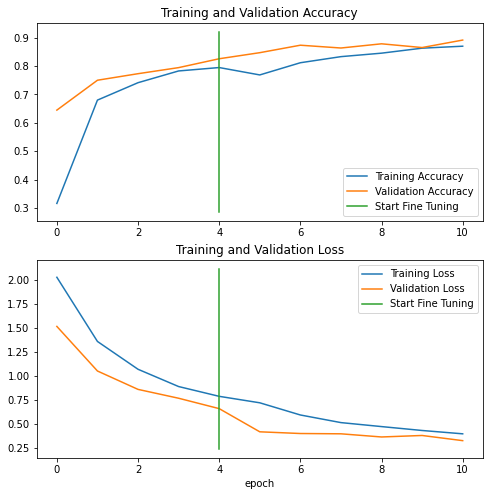

In [49]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent_model_2,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)
